This file contains Python code which implements the RandNLA matrix multiplication from Drineas and Mahoney "Lectures on Randomized Numerical Linear Algebra." Which can be found here: https://arxiv.org/abs/1712.08880

- All of the cells below generate random matrices with dimensions (20,20) with values between 0-1 in each cell; if you want to input your own matrices, check out some of the other notebooks/scripts in the repo.

In [8]:
# import stuff
import numpy as np
import math

#generate random matrices
A = np.random.rand(20,20)
B = np.random.rand(20,20)

#create probability vector
p20 = np.ones(20)
prob = (1/20)*p20


Here is a picture of the pseudocode from the paper:

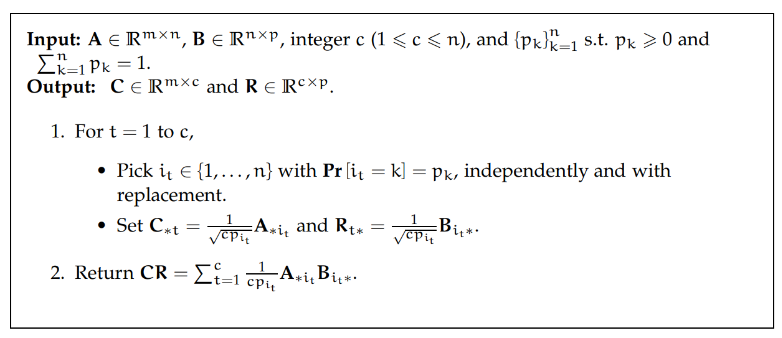

In [9]:
def rand_matrix_mult(A,B,c,prob):
   m = A.shape[0]
   n = A.shape[-1]
   p = B.shape[-1]
   C = np.zeros((m,c))
   R = np.zeros((c,p))
   for t in range(c):
      i_t = np.random.choice(n, p=prob)
      C[:,t] = (1/np.sqrt(c*prob[i_t]))*A[:,i_t]
      R[t,:] = (1/np.sqrt(c*prob[i_t]))*B[i_t, :]
   return np.matmul(C,R)
     
AB = np.matmul(A,B)    
LN = np.dot(A,B)
CR = rand_matrix_mult(A,B,20,prob)

Q = AB - CR
W = AB - LN

print("This is the norm of the error matrix (true - randomized):")
print(np.linalg.norm(Q))

print("These are the norms of the multiplied matrices...")
print("true multiplication: " +  str(np.linalg.norm(AB)))
print("randomized multiplication: " +  str(np.linalg.norm(CR)))

This is the norm of the error matrix (true - randomized):
17.896428595599634
These are the norms of the multiplied matrices...
true multiplication: 103.56401147023386
randomized multiplication: 105.296545465911


In [10]:
#this cell has an implementation of standard matrix multiplication if you would like to use it
##this can be executed if you do not want to use the np.dot() function
result= np.zeros((20,20))
for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]
            
#print(result)
#print(len(B)) #print(len(B[0]))

E = result
O = CR - E
M = AB - E

print("These are the norms of error matrices:")
print("np.dot - true mult algorithm: " + str(np.linalg.norm(M)))
print("randomized mult - true mult algoirthm: " + str(np.linalg.norm(O)))

These are the norms of error matrices:
np.dot - true mult algorithm: 9.122764137081302e-15
randomized mult - true mult algoirthm: 17.89642859559963


In [11]:
##generate sparse matrices
### execute this cell after the first cell if you would like to perform the above operations with sparse matrices
#otherwise ignore this cell
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng

rng = default_rng()
rvs = stats.poisson(25, loc=10).rvs
A = random(365, 77, density=0.25, random_state=rng, data_rvs=rvs)
B = random(77, 12, density=0.25, random_state=rng, data_rvs=rvs)